<a href="https://colab.research.google.com/github/Mayank-004/VC-Industry-Predictive-analysis/blob/main/VC_Target_MOIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing 




## Importing the libraries

In [474]:
import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
random.seed(786)


## Importing the dataset







In [475]:
url1 = 'https://raw.githubusercontent.com/Mayank-004/Project-in-python/main/VC_Exits.csv'
dataset1 = pd.read_csv(url1, error_bad_lines=False)

#url2 = 'https://raw.githubusercontent.com/Mayank-004/Project-in-python/main/VCExit2.csv'
#dataset2 = pd.read_csv(url2, error_bad_lines=False)

url3 = 'https://raw.githubusercontent.com/Mayank-004/Project-in-python/main/VCData2.csv'
dataset3 = pd.read_csv(url3, error_bad_lines=False)

dataset = pd.merge(dataset1,dataset3,left_on=["Company PBID"],right_on=["Company ID"])



dataset.head(2)


,Company PBID,Exit Date,Exit Size (millions),Pre Value (millions),Post Value (millions),Exit Type,Last VC Deal Type,Total VC Capital Raised ($M)***,Total Preferred Capital Raised ($M)*,% Preferred Capital Raised*,Total Preferred Capital Raised ($M) - Combination**,% Preferred Capital Raised - Combination**,MOIC,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Deal ID,Company ID,Primary Industry Sector,Primary Industry Group,Primary Industry Code,All Industries,Verticals_y,Keywords,Current Financing Status,Current Business Status,Universe,CEO PBId,CEO Education,Deal No.,Deal ID.1,Announced Date,Deal Date,Deal Size,Deal Size Status,Pre-money Valuation,...,# Investors,# New Investors,# Follow-on Investors,Implied EV,Revenue,Revenue Growth since last debt deal,Gross Profit,Net Income,EBITDA,EBIT,Total Debt (from financials),Fiscal Year,Valuation/EBITDA,Valuation/EBIT,Valuation/Net Income,Valuation/Revenue,Valuation/Cash Flow,Deal Size/EBITDA,Deal Size/EBIT,Deal Size/Net Income,Deal Size/Revenue,Deal Size/Cash Flow,Debt/EBITDA,Debt/Equity,Implied EV/EBITDA,Implied EV/EBIT,Implied EV/Net Income,Implied EV/Revenue,Implied EV/Cash Flow,EBITDA Margin %,Current Employees,Native Currency of Deal,HQ Location,HQ Global Region,HQ Global Sub Region,Company City,Company State/Province,Company Post Code,Company Country,Year Founded
0,155748-70,11/15/17,NaN,NaN,NaN,Merger/Acquisition,Early Stage VC,NaN,NaN,NaN,NaN,NaN,NaN,Information Technology,Software,Other Software,"3D Printing, TMT, CloudTech & DevOps",Park City,Utah,United States,67911-49T,155748-70,Information Technology,Software,Other Software,"Business/Productivity Software, Other Software*","3D Printing, CloudTech & DevOps, TMT","additives manufacturing software, additives pr...",Formerly VC-backed,Generating Revenue,Venture Capital,131029-48P,"Texas A&M University, Ph.D. (Doctor of Philoso...",1,67911-49T,NaN,01-Jan-2015,0.33,Actual,NaN,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,US Dollars (USD),"Park City, UT",Americas,North America,Park City,Utah,84098,United States,2014.0
1,155748-70,11/15/17,NaN,NaN,NaN,Merger/Acquisition,Early Stage VC,NaN,NaN,NaN,NaN,NaN,NaN,Information Technology,Software,Other Software,"3D Printing, TMT, CloudTech & DevOps",Park City,Utah,United States,122433-04T,155748-70,Information Technology,Software,Other Software,"Business/Productivity Software, Other Software*","3D Printing, CloudTech & DevOps, TMT","additives manufacturing software, additives pr...",Formerly VC-backed,Generating Revenue,Venture Capital,131029-48P,"Texas A&M University, Ph.D. (Doctor of Philoso...",2,122433-04T,NaN,26-May-2015,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,US Dollars (USD),"Park City, UT",Americas,North America,Park City,Utah,84098,United States,2014.0


In [476]:
dataset.describe()

,Deal No.,Deal Size,Total Invested Equity,Debt Type 3,Debt Amount 1,Debt Amount 2,Debt Amount 3,Debt Raised in Round,Contingent Payout,# Investors,# New Investors,# Follow-on Investors,Implied EV,Revenue,Total Debt (from financials),Fiscal Year,Implied EV/EBITDA,Implied EV/EBIT,Implied EV/Net Income,Implied EV/Revenue,Implied EV/Cash Flow,Year Founded
count,305.000000,244.000000,229.000000,0.0,12.000000,1.0,0.0,12.000000,0.0,267.000000,246.000000,140.000000,0.0,81.000000,37.000000,91.000000,0.0,0.0,0.0,0.0,0.0,300.000000
mean,4.072131,38.641844,39.056201,NaN,23.090833,5.0,NaN,23.507500,NaN,3.883895,2.605691,2.792857,NaN,98.809877,22.639730,2016.274725,NaN,NaN,NaN,NaN,NaN,2011.023333
std,2.399570,84.661816,83.502049,NaN,57.814106,NaN,NaN,57.666114,NaN,3.423383,2.421630,1.867929,NaN,161.597687,64.688232,1.686982,NaN,NaN,NaN,NaN,NaN,3.928643
min,1.000000,0.030000,0.020000,NaN,0.040000,5.0,NaN,0.040000,NaN,1.000000,1.000000,1.000000,NaN,0.020000,0.000000,2014.000000,NaN,NaN,NaN,NaN,NaN,1997.000000
25%,2.000000,2.000000,2.500000,NaN,0.212500,5.0,NaN,0.212500,NaN,1.000000,1.000000,1.000000,NaN,6.730000,0.000000,2015.000000,NaN,NaN,NaN,NaN,NaN,2009.000000
50%,4.000000,8.400000,10.000000,NaN,1.500000,5.0,NaN,2.090000,NaN,3.000000,2.000000,2.000000,NaN,32.460000,0.000000,2016.000000,NaN,NaN,NaN,NaN,NaN,2012.000000
75%,5.000000,30.775000,31.000000,NaN,6.250000,5.0,NaN,7.750000,NaN,5.000000,3.000000,4.000000,NaN,100.000000,5.020000,2018.000000,NaN,NaN,NaN,NaN,NaN,2014.000000
max,14.000000,720.000000,720.000000,NaN,200.000000,5.0,NaN,200.000000,NaN,22.000000,16.000000,8.000000,NaN,844.800000,257.200000,2021.000000,NaN,NaN,NaN,NaN,NaN,2017.000000


Filling missing values of Target column MOIC

In [477]:
# target column MOIC is derived by Exit Size divided by Total VC capital raised
dataset['Total VC Capital Raised ($M)***']= dataset['Total VC Capital Raised ($M)***'].str.replace("$","") # removing $ from Total VC capital
dataset['Total VC Capital Raised ($M)***']= dataset['Total VC Capital Raised ($M)***'].str.replace(",","") # removing "," from Total VC capital
dataset.loc[:,'Total VC Capital Raised ($M)***'] = dataset.loc[:,'Total VC Capital Raised ($M)***'].astype(float) # converting Total VC capital to float from string
dataset['Total VC Capital Raised ($M)***']
dataset['Exit Size (millions)']= dataset['Exit Size (millions)'].str.replace("$","") # removing $ from Exit Size
dataset['Exit Size (millions)']= dataset['Exit Size (millions)'].str.replace(",","") # removing "," from Exit Size
dataset.loc[:,'Exit Size (millions)'] = dataset.loc[:,'Exit Size (millions)'].astype(float) # converting Total VC capital to float from string

dataset['MOIC']= dataset['MOIC'].str.replace("x","") # removing $ from MOIC
dataset['MOIC']= dataset['MOIC'].str.replace(",","") # removing ',' from MOIC
dataset.loc[:,'MOIC'] = dataset.loc[:,'MOIC'].astype(float) # converting MOIC to float from string

# drop rows which does not have a value for MOIC
dataset.dropna(subset = ["MOIC"], inplace=True) # Drop rows with no values from Target column


In [478]:
# check missing value in dataset
missing = dataset.isna().sum().sort_values(ascending = False)
percent_missing = ((missing / dataset.isnull().count()) * 100).sort_values(ascending = False)
missing_df = pd.concat([missing,percent_missing], axis = 1, keys = ['Total', 'Percent'],sort = False)
missing_df[missing_df['Total'] >= 1]

,Total,Percent
Implied EV/Cash Flow,108,100.000000
Implied EV/EBIT,108,100.000000
Debt Amount 3,108,100.000000
Contingent Payout,108,100.000000
Implied EV,108,100.000000
...,...,...
Deal Size Status,9,8.333333
CEO PBId,5,4.629630
Post Value (millions),4,3.703704
Raised to Date,4,3.703704


Drop Column which has missing values more than 30%

In [479]:
missing_df = missing_df.reset_index()
over30 = list(missing_df.loc[missing_df['Percent'] >= 30,'index'])
dataset = dataset.drop(over30, axis = 1)

In [480]:
# Drop Column intuitively which may not have significant impact
dataset=dataset.drop(columns=['Native Currency of Deal','Company PBID','Exit Date','Exit Size (millions)','Series','Post Value (millions)','Total Preferred Capital Raised ($M)*','% Preferred Capital Raised*','Total Preferred Capital Raised ($M) - Combination**','% Preferred Capital Raised - Combination**','Total VC Capital Raised ($M)***','Keywords','Deal No.','Deal ID.1','Deal Date','Deal Size Status','Deal Type 2','Deal Class','Deal Status','CEO PBId'])

# Drop duplicate columns  

dataset=dataset.drop(columns=['Deal ID','Deal Type','Company ID','Primary Industry Sector','Primary Industry Group','Primary Industry Code','All Industries','Verticals_y','HQ Location','HQ Global Region','HQ Global Sub Region','Company City',	'Company State/Province',	'Company Post Code',	'Company Country'])





In [481]:
# calculating total working duration of company


from datetime import date 
todays_date = date.today() 

ts =todays_date.year

dataset['Total duration for Company'] = ts - dataset['Year Founded']

dataset=dataset.drop(columns=['Year Founded'])

dataset['Total duration for Company'] 

# adding investors and new investors column together

dataset['# Investors']= dataset['# Investors']+dataset['# New Investors']
dataset=dataset.drop(columns=['# New Investors'])

## Filling Missing Values

In [482]:
# check missing value in df
missing = dataset.isna().sum().sort_values(ascending = False)
percent_missing = ((missing / dataset.isnull().count()) * 100).sort_values(ascending = False)
missing_df = pd.concat([missing,percent_missing], axis = 1, keys = ['Total', 'Percent'],sort = False)
missing_df[missing_df['Total'] >= 1]

,Total,Percent
CEO Education,24,22.222222
State,21,19.444444
# Investors,17,15.740741
Total Invested Equity,14,12.962963
VC Round,14,12.962963
Current Employees,14,12.962963
Deal Size,9,8.333333
Raised to Date,4,3.703704
Total duration for Company,1,0.925926


In [483]:
# filling dataset missing values in columns State, CEO Education and VC round
dataset= dataset.fillna({
'State' : 'NOT IN USA' ,
'CEO Education': 'No Known Education',
'VC Round' : 'not known'
})

# filling Investors missing value by mean of other row values
dataset['# Investors'] = dataset['# Investors'].fillna((dataset['# Investors'].mean()))

# filling missing values in Raised to date column with mean 

dataset['Raised to Date']= dataset['Raised to Date'].str.replace(",","")

dataset.loc[:,'Raised to Date'] = dataset.loc[:,'Raised to Date'].astype(float)

dataset['Raised to Date'] = dataset['Raised to Date'].fillna((dataset['Raised to Date'].mean()))

# filling missing values in Total duration for Company column with mean 

dataset['Total duration for Company'] = dataset['Total duration for Company'].fillna((dataset['Total duration for Company'].mean()))

# filling missing values in Raised to date column with mean 

dataset['Current Employees']= dataset['Current Employees'].str.replace(",","")
dataset.loc[:,'Current Employees'] = dataset.loc[:,'Current Employees'].astype(float)

dataset['Current Employees'] = dataset['Current Employees'].fillna((dataset['Current Employees'].mean()))

# filling missing values in all other columns with mean 

dataset = dataset.fillna((dataset.mean()))


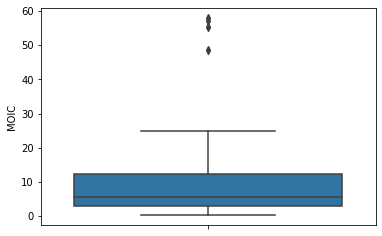

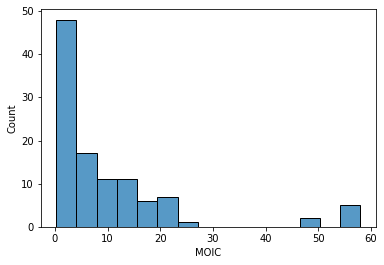

[Text(0, 0, 'Generating Revenue'),
 Text(0, 0, 'Stealth'),
 Text(0, 0, 'Generating Revenue/Not Profitable'),
 Text(0, 0, 'Startup'),
 Text(0, 0, 'Profitable')]

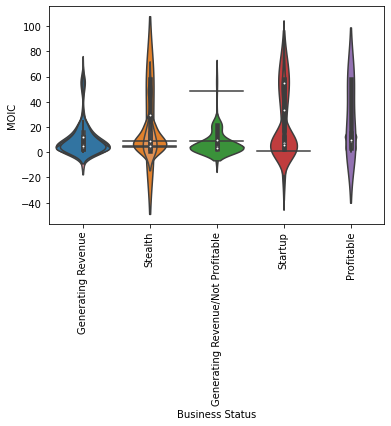

In [484]:
# check MOIC's distribution
import seaborn as sn

sn.boxplot(y=dataset["MOIC"])
plt.show()
sn.histplot(dataset, x ='MOIC')
plt.show()


# check the relationship between MOIC and Primary Industry Sector
v1 = sn.violinplot(x="Industry Sector", y="MOIC", data=dataset, size=6)
v1.set_xticklabels(v1.get_xticklabels(),rotation=90)

#Primary Industry Sector can be encoded into 2 types

# check the relationship between MOIC and Current Financing Status
v2 = sn.violinplot(x="Current Financing Status", y="MOIC", data=dataset, size=6)
v2.set_xticklabels(v2.get_xticklabels(),rotation=90)

#Current Financing Status can be encoded into 4 types

# check the relationship between MOIC and Current Business Status
v3 = sn.violinplot(x="Current Business Status", y="MOIC", data=dataset, size=6)
v3.set_xticklabels(v3.get_xticklabels(),rotation=90)

# Current Business Status can be encoded into 2 types

# check the relationship between MOIC and Universe
v4 = sn.violinplot(x="Universe", y="MOIC", data=dataset, size=6)
v4.set_xticklabels(v4.get_xticklabels(),rotation=90)

#Universe can be encoded into 4 types

# check the relationship between MOIC and VC Round
v5 = sn.violinplot(x="VC Round", y="MOIC", data=dataset, size=6)
v5.set_xticklabels(v5.get_xticklabels(),rotation=90)

# VC Round Status can be encoded into 2 types

# check the relationship between MOIC and Business Status
v7 = sn.violinplot(x="Business Status", y="MOIC", data=dataset, size=6)
v7.set_xticklabels(v7.get_xticklabels(),rotation=90)

#Business Status can be encoded into 3 types



## Encoding categorical data

Label Encoding of Categorical Variable

In [485]:

from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()


dataset[['Exit Type']] = le.fit_transform(dataset[['Exit Type']].astype(str))

dataset[['Last VC Deal Type']] = le.fit_transform(dataset[['Last VC Deal Type']].astype(str))

dataset[['Industry Sector']] = le.fit_transform(dataset[['Industry Sector']].astype(str))

dataset[['Industry Group']] = le.fit_transform(dataset[['Industry Group']].astype(str))

dataset[['Industry Code']] = le.fit_transform(dataset[['Industry Code']].astype(str))

dataset[['Verticals_x']] = le.fit_transform(dataset[['Verticals_x']].astype(str))

dataset[['City']] = le.fit_transform(dataset[['City']].astype(str))

dataset[['State']] = le.fit_transform(dataset[['State']].astype(str))
#dataset[['Deal Type']] = le.fit_transform(dataset[['Deal Type']].astype(str))

dataset[['Country']] = le.fit_transform(dataset[['Country']].astype(str))
dataset[['Current Financing Status']] = le.fit_transform(dataset[['Current Financing Status']].astype(str))
dataset[['Current Business Status']] = le.fit_transform(dataset[['Current Business Status']].astype(str))
dataset[['Universe']] = le.fit_transform(dataset[['Universe']].astype(str))
dataset[['CEO Education']] = le.fit_transform(dataset[['CEO Education']].astype(str))
dataset[['VC Round']] = le.fit_transform(dataset[['VC Round']].astype(str))
dataset[['Business Status']] = le.fit_transform(dataset[['Business Status']].astype(str))
dataset[['Financing Status']] = le.fit_transform(dataset[['Financing Status']].astype(str))


dataset

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Exit Type,Last VC Deal Type,MOIC,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Current Financing Status,Current Business Status,Universe,CEO Education,Deal Size,Raised to Date,VC Round,Total Invested Equity,Business Status,Financing Status,# Investors,Current Employees,Total duration for Company
3,2,1,16.44,1,3,2,13,9,10,7,1,0,7,5,10.10,10.10,1,10.10,0,4,2.000000,6.000000,8.0
17,2,6,3.81,1,3,9,1,20,0,7,1,0,7,12,3.30,3.30,1,3.30,4,4,6.000000,660.553191,6.0
18,2,6,3.81,1,3,9,1,20,0,7,1,0,7,12,14.50,17.80,2,14.50,0,4,3.000000,660.553191,6.0
19,2,6,3.81,1,3,9,1,20,0,7,1,0,7,25,20.00,37.80,3,20.00,0,4,8.000000,660.553191,6.0
21,2,12,8.94,1,3,2,18,19,0,7,1,0,0,9,158.00,335.00,6,158.00,0,4,20.000000,2062.000000,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,1,12,0.60,1,3,2,18,22,0,7,1,0,6,45,124.55,260.00,6,124.55,0,4,14.000000,200.000000,13.0
297,2,12,0.22,1,3,3,18,11,7,7,1,0,2,10,12.13,165.10,9,12.13,0,4,6.879121,660.553191,16.0
298,2,12,0.22,1,3,3,18,11,7,7,1,0,2,7,51.35,139.00,8,51.35,0,4,18.000000,660.553191,16.0
303,1,9,55.20,1,3,3,16,20,0,7,1,2,6,25,114.97,160.75,5,114.97,0,4,12.000000,3871.000000,10.0


Changing Data type of Column to perform correlation matrix

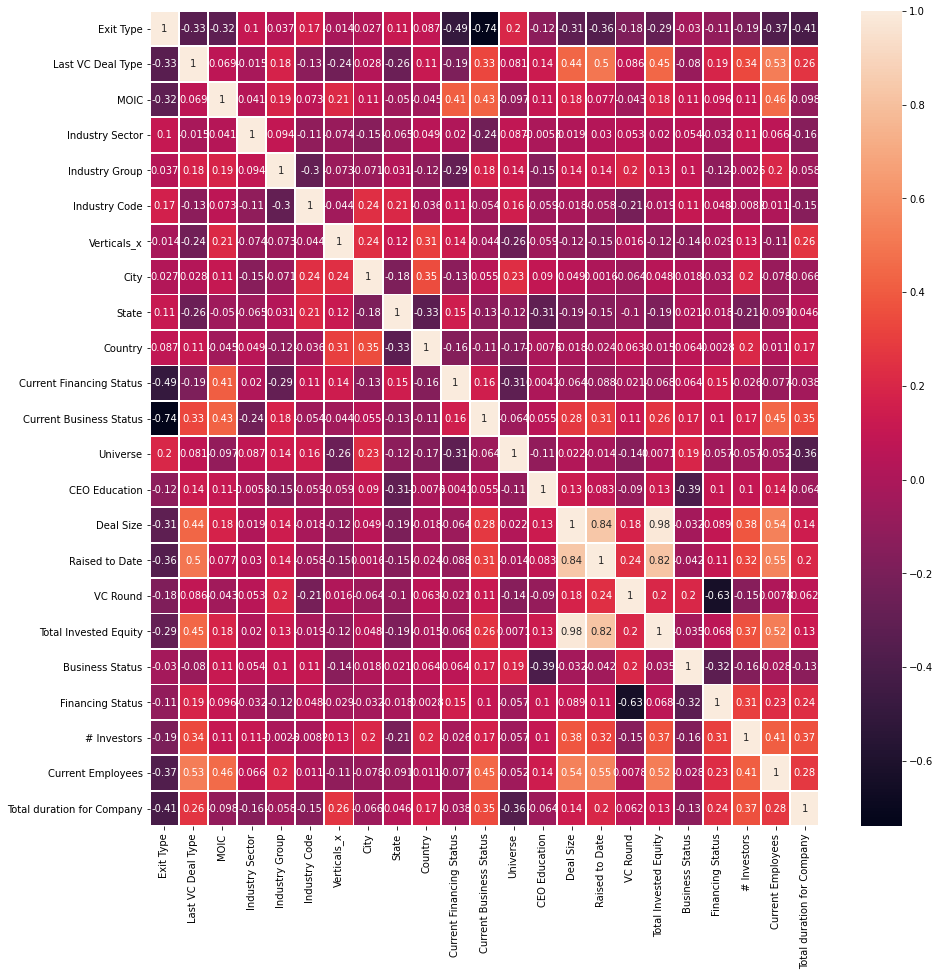

In [486]:

corrMatrix= dataset.corr()

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches

sn.heatmap(corrMatrix, annot=True,linewidth=0.8)
plt.show()

Removal of The columns which are highly related to other columns

In [487]:
dataset=dataset.drop(columns=['Deal Size'])

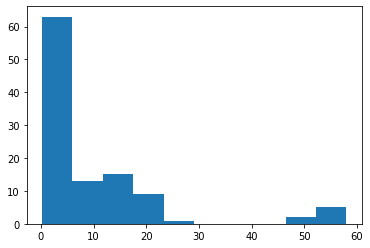

In [488]:
# histogram plot
from matplotlib import pyplot

pyplot.hist(dataset['MOIC'])
pyplot.show()

In [489]:
dataset

,Exit Type,Last VC Deal Type,MOIC,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Current Financing Status,Current Business Status,Universe,CEO Education,Raised to Date,VC Round,Total Invested Equity,Business Status,Financing Status,# Investors,Current Employees,Total duration for Company
3,2,1,16.44,1,3,2,13,9,10,7,1,0,7,5,10.10,1,10.10,0,4,2.000000,6.000000,8.0
17,2,6,3.81,1,3,9,1,20,0,7,1,0,7,12,3.30,1,3.30,4,4,6.000000,660.553191,6.0
18,2,6,3.81,1,3,9,1,20,0,7,1,0,7,12,17.80,2,14.50,0,4,3.000000,660.553191,6.0
19,2,6,3.81,1,3,9,1,20,0,7,1,0,7,25,37.80,3,20.00,0,4,8.000000,660.553191,6.0
21,2,12,8.94,1,3,2,18,19,0,7,1,0,0,9,335.00,6,158.00,0,4,20.000000,2062.000000,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,1,12,0.60,1,3,2,18,22,0,7,1,0,6,45,260.00,6,124.55,0,4,14.000000,200.000000,13.0
297,2,12,0.22,1,3,3,18,11,7,7,1,0,2,10,165.10,9,12.13,0,4,6.879121,660.553191,16.0
298,2,12,0.22,1,3,3,18,11,7,7,1,0,2,7,139.00,8,51.35,0,4,18.000000,660.553191,16.0
303,1,9,55.20,1,3,3,16,20,0,7,1,2,6,25,160.75,5,114.97,0,4,12.000000,3871.000000,10.0


In [490]:
X = dataset.loc[:,dataset.columns!='MOIC']
Y = dataset['MOIC']
#X1 = dataset.iloc[:, 0:2]
#X2 = dataset.iloc[:, 3:-1]
#X= pd.concat([X1,X2],axis=1)
#Y = dataset.iloc[:,2:3]

In [491]:
X

,Exit Type,Last VC Deal Type,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Current Financing Status,Current Business Status,Universe,CEO Education,Raised to Date,VC Round,Total Invested Equity,Business Status,Financing Status,# Investors,Current Employees,Total duration for Company
3,2,1,1,3,2,13,9,10,7,1,0,7,5,10.10,1,10.10,0,4,2.000000,6.000000,8.0
17,2,6,1,3,9,1,20,0,7,1,0,7,12,3.30,1,3.30,4,4,6.000000,660.553191,6.0
18,2,6,1,3,9,1,20,0,7,1,0,7,12,17.80,2,14.50,0,4,3.000000,660.553191,6.0
19,2,6,1,3,9,1,20,0,7,1,0,7,25,37.80,3,20.00,0,4,8.000000,660.553191,6.0
21,2,12,1,3,2,18,19,0,7,1,0,0,9,335.00,6,158.00,0,4,20.000000,2062.000000,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,1,12,1,3,2,18,22,0,7,1,0,6,45,260.00,6,124.55,0,4,14.000000,200.000000,13.0
297,2,12,1,3,3,18,11,7,7,1,0,2,10,165.10,9,12.13,0,4,6.879121,660.553191,16.0
298,2,12,1,3,3,18,11,7,7,1,0,2,7,139.00,8,51.35,0,4,18.000000,660.553191,16.0
303,1,9,1,3,3,16,20,0,7,1,2,6,25,160.75,5,114.97,0,4,12.000000,3871.000000,10.0


## Splitting the dataset into the Training set and Test set

In [492]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 786)

In [493]:
type(y_test)

pandas.core.series.Series

### Building Models

Defining Function for Model Performance evaluation

In [494]:
def eval_result(y_train,y_predtrain,y_test,y_predtest):

    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error

    rmse_train = mean_squared_error(y_train, y_predtrain, squared=False)
    print( f"RMSE Train error is {rmse_train}")
    rmse_test = mean_squared_error(y_test, y_predtest, squared=False)
    print( f"RMSE Test error is {rmse_test}")
    
    mae_train= mean_absolute_error(y_train, y_predtrain)
    print( f"MAE Train error is {mae_train}")
    mae_test= mean_absolute_error(y_test, y_predtest)
    print( f"MAE Test error is {mae_test}")

    RRSE_train = np.sqrt(np.mean((np.square(y_train-y_predtrain))/(np.square(np.mean(y_train)-y_train))))
    print( f"Root relative squared Train error is {RRSE_train}")
    RRSE_test = np.sqrt(np.mean((np.square(y_test-y_predtest))/(np.square(np.mean(y_test)-y_test))))
    print( f"Root relative squared Test error is {RRSE_test}")


    pr1=pd.DataFrame(y_predtest,columns=["Pred"])

    #pr1["Actual"]=y_test["MOIC"].values
    #print(f"{pr1}")
    pr1=pd.DataFrame(y_predtest,columns=["Pred"])

    pr1["Actual"]=y_test.values

    pr1['Percentage error']=((pr1['Actual']-pr1['Pred'])/pr1['Actual'])*100
    print(f"{pr1}")

   
  

Linear Regression

In [495]:
from sklearn.linear_model import LinearRegression
multlin_model = LinearRegression()
multlin_model.fit(X_train,y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predicting result

In [496]:
y_predtestlin= multlin_model.predict(X_test)

y_predtrainlin = multlin_model.predict(X_train)


In [497]:
y_predtrain.mean(axis=0)

8.667906976744186

evaluating model performance

In [498]:
eval_result(y_train,y_predtrainlin,y_test,y_predtestlin)

RMSE Train error is 6.288412488413297
RMSE Test error is 9.758267744532821
MAE Train error is 4.998247937893425
MAE Test error is 7.013794504312805
Root relative squared Train error is 2.0643904016970764
Root relative squared Test error is 16.329789696597427
         Pred  Actual  Percentage error
0   14.841751   12.00        -23.681260
1   -3.342388    4.06        182.324822
2   12.694275   12.00         -5.785628
3   10.160373    3.05       -233.126999
4    7.099888    3.65        -94.517476
5   -0.238073    2.27        110.487783
6    5.277213    0.73       -622.905949
7    6.174830   18.53         66.676577
8   -9.458996    0.22       4399.543762
9   22.383075    9.92       -125.635837
10   6.731615    2.70       -149.319067
11  10.388181    3.65       -184.607686
12  22.340247   48.52         53.956621
13   6.033666    5.77         -4.569601
14   3.650832    5.97         38.847030
15  25.868030   21.29        -21.503196
16   6.689785   12.39         46.006574
17  -0.756544    2.27

In [499]:
# get importance
importance_lin = multlin_model.coef_
print(multlin_model.coef_,X.columns)
coef_dict = dict(zip(X.columns,importance_lin))



[ 4.03153972e+00 -4.67062826e-01  7.21860381e+00  2.37880499e+00
 -2.23489296e-01  7.24532253e-01  3.46196917e-01 -5.71112568e-01
 -7.83603377e-01  1.05598407e+01  5.95561251e+00 -5.07020027e-04
  9.72458298e-02 -1.62831210e-02 -7.42320728e-02  2.49159440e-02
  1.01231856e+00  4.94892350e-01 -5.91070387e-01  1.02582110e-02
 -9.83684145e-01] Index(['Exit Type', 'Last VC Deal Type', 'Industry Sector', 'Industry Group',
       'Industry Code', 'Verticals_x', 'City', 'State', 'Country',
       'Current Financing Status', 'Current Business Status', 'Universe',
       'CEO Education', 'Raised to Date', 'VC Round', 'Total Invested Equity',
       'Business Status', 'Financing Status', '# Investors',
       'Current Employees', 'Total duration for Company'],
      dtype='object')


Ridge Regression

---



In [500]:
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

from numpy import absolute
from numpy import mean
from numpy import std
import numpy as np
import math


# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)

# ridge regression

ridge_model= Ridge()


ridge_regressor=GridSearchCV(ridge_model, grid, scoring='neg_mean_squared_error',cv=10, return_train_score=True, verbose=0)
results=ridge_regressor.fit(X_train,y_train)

In [501]:
print('RMSE: %.3f' % math.sqrt(abs(results.best_score_))) ##  mean square error
print('Config: %s' % results.best_params_)   # printing best alpha

RMSE: 10.904
Config: {'alpha': 0.99}


In [502]:

ridge_model= Ridge(alpha=0.11)
ridge_model.fit(X_train,y_train)
y_predtrainridge= ridge_model.predict(X_train)




In [503]:
y_predtestridge= ridge_model.predict(X_test)



Evaluating model performance

In [504]:
eval_result(y_train,y_predtrainridge,y_test,y_predtestridge)

RMSE Train error is 6.289971216132029
RMSE Test error is 9.849752586766245
MAE Train error is 5.010751310016792
MAE Test error is 7.051687457457255
Root relative squared Train error is 2.059452443761608
Root relative squared Test error is 16.369218527060237
         Pred  Actual  Percentage error
0   14.852776   12.00        -23.773134
1   -3.303876    4.06        181.376244
2   12.493842   12.00         -4.115348
3   10.113940    3.05       -231.604577
4    7.056860    3.65        -93.338617
5   -0.232898    2.27        110.259822
6    5.190863    0.73       -611.077104
7    6.253659   18.53         66.251168
8   -9.566409    0.22       4448.367646
9   22.385018    9.92       -125.655428
10   6.891394    2.70       -155.236804
11  10.216855    3.65       -179.913834
12  22.072468   48.52         54.508516
13   6.114300    5.77         -5.967067
14   3.666484    5.97         38.584863
15  25.914748   21.29        -21.722628
16   6.554965   12.39         47.094712
17  -0.727568    2.27 

In [505]:
# get importance
importance_ridge = ridge_model.coef_
print(ridge_model.coef_,X.columns)
coef_dict = dict(zip(X.columns,importance_ridge))



[ 3.67217813e+00 -4.77333797e-01  6.19535027e+00  2.35747935e+00
 -2.16199518e-01  7.28262622e-01  3.39776168e-01 -5.73788735e-01
 -7.92425579e-01  1.01224875e+01  5.71841736e+00 -5.03890907e-03
  9.70719458e-02 -1.63306162e-02 -5.81529616e-02  2.46175190e-02
  1.05034634e+00  5.79481064e-01 -5.83685751e-01  1.02892403e-02
 -1.01213321e+00] Index(['Exit Type', 'Last VC Deal Type', 'Industry Sector', 'Industry Group',
       'Industry Code', 'Verticals_x', 'City', 'State', 'Country',
       'Current Financing Status', 'Current Business Status', 'Universe',
       'CEO Education', 'Raised to Date', 'VC Round', 'Total Invested Equity',
       'Business Status', 'Financing Status', '# Investors',
       'Current Employees', 'Total duration for Company'],
      dtype='object')


In [506]:
#ridge_regressor.cv_results_

### Lasso Regression

In [507]:
from sklearn.linear_model import Lasso


lasso_model= Lasso()


lasso_regressor=GridSearchCV(lasso_model, grid, scoring='neg_mean_squared_error',cv=10, return_train_score=True, verbose=0)
results=lasso_regressor.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1331.2147429490444, tolerance: 1.1582055071641792
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dis

In [508]:
print('MSE: %.3f' % math.sqrt(abs(results.best_score_)))  ## mean square error
print(' %s' % results.best_params_)   # printing best alpha

MSE: 10.773
 {'alpha': 0.2}


In [509]:
lasso_model= Lasso(alpha=0.85)
lasso_model.fit(X_train,y_train)
y_predtrainlasso= lasso_model.predict(X_train)



In [510]:
y_predtestlasso= ridge_model.predict(X_test)


Evaluating model performance

In [511]:
eval_result(y_train,y_predtrainlasso,y_test,y_predtestlasso)

RMSE Train error is 7.17807267187785
RMSE Test error is 9.849752586766245
MAE Train error is 5.141724795090167
MAE Test error is 7.051687457457255
Root relative squared Train error is 1.6939366174183808
Root relative squared Test error is 16.369218527060237
         Pred  Actual  Percentage error
0   14.852776   12.00        -23.773134
1   -3.303876    4.06        181.376244
2   12.493842   12.00         -4.115348
3   10.113940    3.05       -231.604577
4    7.056860    3.65        -93.338617
5   -0.232898    2.27        110.259822
6    5.190863    0.73       -611.077104
7    6.253659   18.53         66.251168
8   -9.566409    0.22       4448.367646
9   22.385018    9.92       -125.655428
10   6.891394    2.70       -155.236804
11  10.216855    3.65       -179.913834
12  22.072468   48.52         54.508516
13   6.114300    5.77         -5.967067
14   3.666484    5.97         38.584863
15  25.914748   21.29        -21.722628
16   6.554965   12.39         47.094712
17  -0.727568    2.27 

In [512]:
# get importance
importance_lasso = lasso_model.coef_
print(lasso_model.coef_,X.columns)
coef_dict = dict(zip(X.columns,importance_lasso))


[-0.         -0.4985883   0.          0.         -0.05196932  0.72022397
  0.20321424 -0.52299565 -0.75017922  0.52805656  2.07492353 -0.
  0.06611589 -0.01696911  0.00639651  0.02154343  0.62806592  0.10491012
 -0.41278825  0.01082676 -1.18819822] Index(['Exit Type', 'Last VC Deal Type', 'Industry Sector', 'Industry Group',
       'Industry Code', 'Verticals_x', 'City', 'State', 'Country',
       'Current Financing Status', 'Current Business Status', 'Universe',
       'CEO Education', 'Raised to Date', 'VC Round', 'Total Invested Equity',
       'Business Status', 'Financing Status', '# Investors',
       'Current Employees', 'Total duration for Company'],
      dtype='object')


In [513]:
# Read out attributes
coeffs = lasso_model.coef_         # dense np.array

coeffs



array([-0.        , -0.4985883 ,  0.        ,  0.        , -0.05196932,
        0.72022397,  0.20321424, -0.52299565, -0.75017922,  0.52805656,
        2.07492353, -0.        ,  0.06611589, -0.01696911,  0.00639651,
        0.02154343,  0.62806592,  0.10491012, -0.41278825,  0.01082676,
       -1.18819822])

### XGBOOST

In [514]:
# Train and test set are converted to DMatrix objects, 
# as it is required by learning API. 
import xgboost as xg 


train_dmatrix = xg.DMatrix(data = X_train, label = y_train) 
test_dmatrix = xg.DMatrix(data = X_test, label = y_test) 
  
# Parameter dictionary specifying base learner 
param = {"booster":"gbtree", "objective":"reg:linear"} 
  
xgb_r = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = 10) 

  


[00:12:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Predicting results

In [515]:
y_trainpredxg =xgb_r.predict(train_dmatrix)
y_testpredxg = xgb_r.predict(test_dmatrix) 

Model Performance evaluation

In [516]:
 eval_result(y_train,y_trainpredxg,y_test,y_testpredxg)

RMSE Train error is 2.352606567747909
RMSE Test error is 11.682321747182423
MAE Train error is 1.5701009716033938
MAE Test error is 5.354422651348692
Root relative squared Train error is 0.532645704073358
Root relative squared Test error is 1.882848554127096
         Pred  Actual  Percentage error
0    7.516166   12.00         37.365286
1    4.555648    4.06        -12.208087
2    3.227591   12.00         73.103408
3    2.833658    3.05          7.093189
4    6.117943    3.65        -67.614872
5   11.361911    2.27       -400.524706
6    8.049671    0.73      -1002.694681
7   10.393645   18.53         43.909092
8    3.202147    0.22      -1355.521258
9    9.552689    9.92          3.702736
10   3.486668    2.70        -29.135838
11   4.942832    3.65        -35.420055
12   3.999825   48.52         91.756337
13   5.203037    5.77          9.826052
14   5.852349    5.97          1.970699
15  19.097511   21.29         10.298209
16  11.675318   12.39          5.768218
17   5.478376    2.27

In [517]:
y_trainpredxg.mean(axis=0)

9.744038

In [518]:
xgb_r.get_score(importance_type='weight')


{'# Investors': 1,
 'CEO Education': 9,
 'City': 2,
 'Country': 5,
 'Current Employees': 21,
 'Exit Type': 13,
 'Industry Code': 6,
 'Industry Group': 3,
 'Last VC Deal Type': 8,
 'Raised to Date': 14,
 'State': 2,
 'Total Invested Equity': 2,
 'Total duration for Company': 5,
 'Universe': 2,
 'VC Round': 4,
 'Verticals_x': 5}